In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [143]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [144]:
df.shape

(200, 5)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [146]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [147]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [148]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [149]:
x=df.iloc[:,[3,4]].values
x


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [150]:
conda update numpy scikit-learn threadpoolctl



Note: you may need to restart the kernel to use updated packages.



PackageNotInstalledError: Package is not installed in prefix.
  prefix: C:\Users\purni\anaconda3
  package name: scikit-learn




C:\Users\purni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


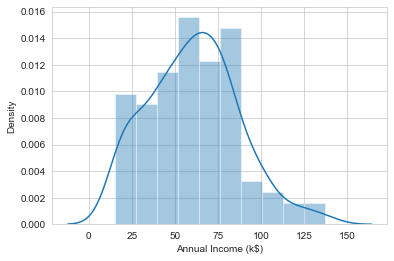

In [151]:
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.show()

C:\Users\purni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


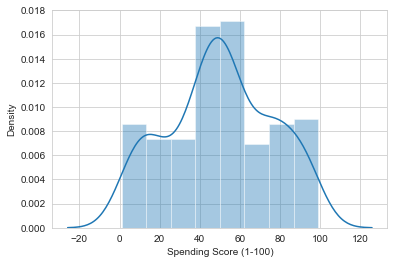

In [152]:
sns.set_style('whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.show()

C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


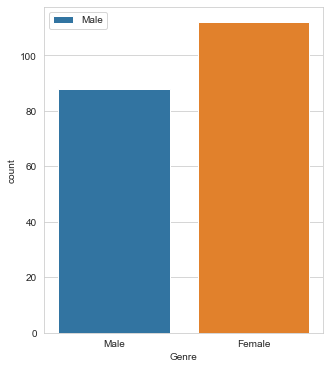

In [153]:
plt.figure(figsize=(5,6))
sns.countplot(df['Genre'])
plt.legend(['Male','Female'])
plt.show()

In [154]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


<h3>Choosing the number of clusters</h3>
wcss-within clusters sum of squares

In [155]:
#finding wcss values for different number of Clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=42,n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print("The wcss values for different number of Clusters:")
wcss

C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

The wcss values for different number of Clusters:


C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25036.41760403398,
 21916.794789843727,
 20072.070939404006]

In [156]:
pip install --upgrade numpy scikit-learn threadpoolctl

  Using cached numpy-1.25.2-cp39-cp39-win_amd64.whl (15.6 MB)
Note: you may need to restart the kernel to use updated packages.


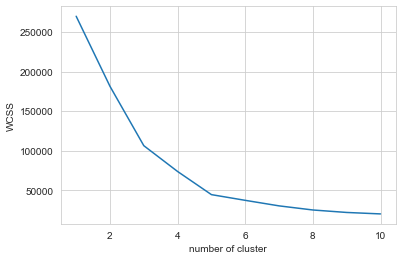

In [157]:
plt.plot(range(1,11),wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [158]:
km=KMeans(n_clusters=5)
km.fit(x)
y=km.predict(x)
df['label']=y
df

C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [159]:
df.label.unique()

array([0, 4, 1, 2, 3])

C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


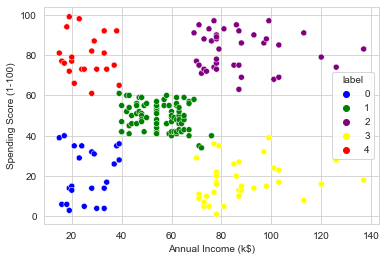

In [160]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],palette=['blue','green','purple','yellow','red'],hue=df['label'],data=df)
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()

Silhouette_score
This function returns the mean Silhouette Coefficient over all samples.

In [161]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,df['label'])
print("kmean score",score)

kmean score 0.553931997444648


Affinity Propagation
 Affinity Propagation creates clusters by sending messages between data points until convergence. Unlike clustering algorithms such as k-means or k-medoids, affinity propagation does not require the number of clusters to be determined or estimated before running the algorithm.

In [162]:
from sklearn.cluster import AffinityPropagation
af=AffinityPropagation()
af.fit(x)
labels=af.labels_

cluster_centers=af.cluster_centers_
print('labels\n',labels)
print("cluster centers\n",cluster_centers)

labels
 [ 2  1  0  1  2  1  0  1  0  1  0  1  0  1  0  1  2  1  2  1  2  1  0  1
  0  1  2  3  2  1  0  1  0  1  0  1  0  1  2  1  2  1  2  3  2  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  4  5  5  4
  4  4  5  4  5  4  4  4  4  5  4  4  5  4  4  4  5  5  4  4  5  4  5  4
  4  5  4  7  5  8  5  7  6  8  6  8  5  8  6  7  6  8  6  8  6  7  5  7
  6  7  5  8  6  7  6  7  6  8  6  7  6  8  6  8  5  7  6  7  6  8  6  7
 10  8  6  8  6  7  6  7  6  8 10  9 10  9 10  9 10  9 10  9 10  9 10  9
 10  9 10  9 10  9 10  9]
cluster centers
 [[ 25   5]
 [ 28  82]
 [ 28  32]
 [ 46  51]
 [ 60  52]
 [ 67  40]
 [ 77  12]
 [ 78  90]
 [ 78  73]
 [103  85]
 [103  23]]


C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


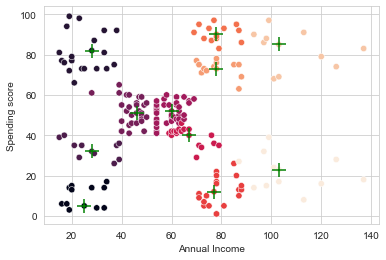

In [163]:
sns.scatterplot(x[:,0],x[:,1],c=labels,s=40)#c is color and s is size
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker="+",s=200,c='g')
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.show()

In [164]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,labels)
print("Affinity Propation",score)

Affinity Propation 0.4317941560811469


In [165]:
from sklearn.cluster import Birch
birch=Birch()
birch.fit(x)
birch_labels=birch.labels_
print("birch labels\n",birch_labels)
birch_clusters=birch.subcluster_centers_
print("Sub Clusters center\n",birch_clusters)

birch labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
Sub Clusters center
 [[ 15.          81.        ]
 [ 16.          77.        ]
 [ 17.          76.        ]
 [ 18.          94.        ]
 [ 19.          72.        ]
 [ 19.          99.        ]
 [ 20.          77.        ]
 [ 20.          79.        ]
 [ 21.          66.        ]
 [ 23.          98.        ]
 [ 24.5         73.        ]
 [ 28.          82.        ]
 [ 28.          61.        ]
 [ 29.          87.        ]
 [ 30.          73.        ]
 [ 33.          92.        ]
 [ 33.          81.        ]
 [ 34.          73.        ]
 [ 37.          75.        ]
 [ 38. 

C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


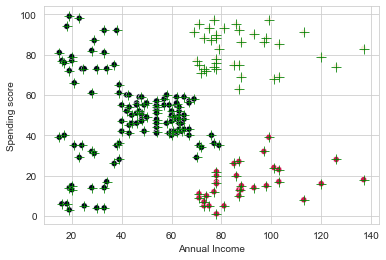

In [166]:
sns.scatterplot(x[:,0],x[:,1],c=birch_labels)
sns.scatterplot(birch_clusters[:,0],birch_clusters[:,1],color='g',marker='+',s=100)
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.show()

In [167]:
score=silhouette_score(x,birch_labels)
print("Birch score",score)

Birch score 0.4618340266628975


<h3>DBSCAN</h3>
<p>The DBSCAN algorithm views clusters as areas of high density separated by areas of low density</p>

In [168]:
from sklearn.cluster import DBSCAN
db=DBSCAN()
db.fit(x)
db_labels=db.labels_
print(db_labels)# if label is -1 that means it is noise sample

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


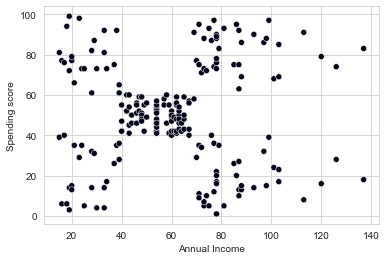

In [169]:
sns.scatterplot(x[:,0],x[:,1],c=db_labels)
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.show()

In [170]:
from sklearn.cluster import MiniBatchKMeans
mini=MiniBatchKMeans()
mini.fit(x)
mini_labels=mini.labels_
print("Mini Batch Kmeans labels",mini_labels)
mini_cluster=mini.cluster_centers_
print("cluster centers\n",mini_cluster)

C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Mini Batch Kmeans labels [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 6 3 4 3 4 3 4 3 4 3
 4 3 4 6 4 6 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 5 7 5 7 5 7
 5 7 5 7 5 7 5 7 5 7 5 7 5 7 5]
cluster centers
 [[ 60.94416244  48.49111675]
 [ 76.68508287  82.31767956]
 [ 80.39402174  15.11141304]
 [ 25.13069909  18.06382979]
 [ 24.65384615  80.61538462]
 [102.8097561   80.68780488]
 [ 44.25360825  51.4185567 ]
 [110.54304636  21.20529801]]


C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


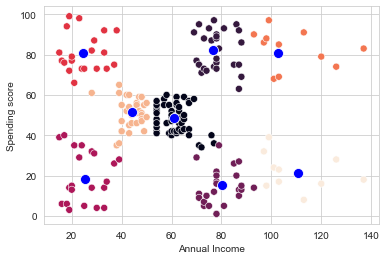

In [171]:
sns.scatterplot(x[:,0],x[:,1],c=mini_labels,s=50)
sns.scatterplot(mini_cluster[:,0],mini_cluster[:,1],color='blue',s=100)
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.show()

In [172]:
score=silhouette_score(x,mini_labels)
print("Mini Batch Kmean",score)

Mini Batch Kmean 0.45704384633565154


In [173]:
from sklearn.cluster import MeanShift
ms=MeanShift(bandwidth=25)
ms.fit(x)
ms_labels=ms.labels_
print(ms_labels)
ms_cluster=ms.cluster_centers_
print(ms_cluster)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[[54.70238095 49.36904762]
 [82.25714286 82.17142857]
 [82.15151515 18.15151515]
 [27.6        77.08      ]
 [26.30434783 20.91304348]]


C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


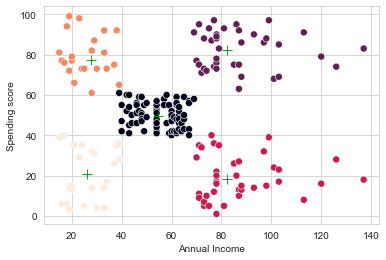

In [174]:
sns.scatterplot(x[:,0],x[:,1],c=ms_labels,s=50)
sns.scatterplot(ms_cluster[:,0],ms_cluster[:,1],marker="+",color='g',s=100)
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.show()

In [175]:
score=silhouette_score(x,ms_labels)
print("MeanShift score",score)

MeanShift score 0.5513250428036421


The OPTICS algorithm shares many similarities with the DBSCAN algorithm, and can be considered a generalization of DBSCAN that relaxes the eps requirement from a single value to a value range

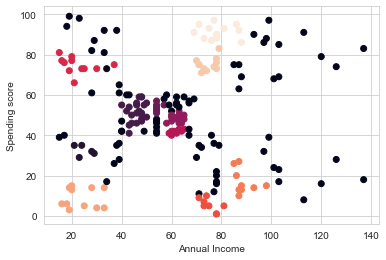

In [176]:
from sklearn.cluster import OPTICS
ot=OPTICS()
ot.fit(x)
ot_labels=ot.labels_
plt.scatter(x[:,0],x[:,1],c=ot_labels)
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.show()


In [177]:
score=silhouette_score(x,ot_labels)
print("MeanShift score",score)

MeanShift score 0.035688157101128805


Spectral clustering
Spectral Clustering can also be used to partition graphs via their spectral embeddings

In [178]:
import os
os.OMP_NUM_THREADS=1

C:\Users\purni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\purni\anaconda3\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


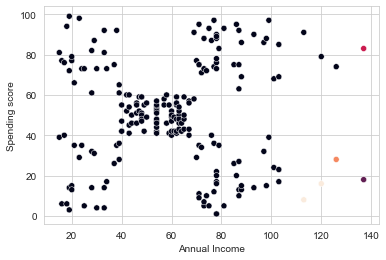

In [179]:
from sklearn.cluster import SpectralClustering
sc=SpectralClustering()
sc.fit(x)
sc_labels=sc.labels_
sns.scatterplot(x[:,0],x[:,1],c=sc_labels)
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.show()

In [180]:
score=silhouette_score(x,sc_labels)
print("Spectral Clustering score",score)

Spectral Clustering score 0.2900916171834225


C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


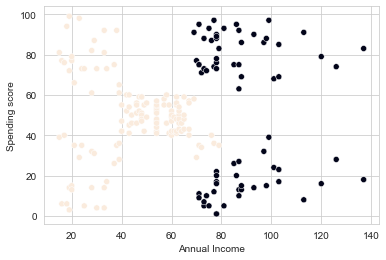

In [181]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering()
ac.fit(x)
ac_labels=ac.labels_
sns.scatterplot(x[:,0],x[:,1],c=ac_labels)
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.show()

In [182]:
score=silhouette_score(x,ac_labels)
print("Agglomerative clustering score",score)

Agglomerative clustering score 0.36706444723912895
